# ERA5-land
u10, v10 and tp

Use of Cartopy because I don't know how to make background with tpoplot

In [13]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import tpoplot as plot # New plot library (https://tpoplot.readthedocs.io/en/latest/)
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)
import os

In [2]:
# Define zone
latlim=(0,50)
lonlim=(45,120)

period=slice('2019-06','2019-09')

In [4]:
u10 = xr.open_mfdataset(
    '/bdd/ERA5-Land/NETCDF/GLOBAL_01/hourly/FC_SF/2019/u10.*.fs1e5l.GLOBAL_01.nc', combine='by_coords'
).u10.sel(
    latitude=slice(latlim[1],latlim[0]), longitude=slice(lonlim[0],lonlim[1]), time=period
)
u10.load()

<xarray.DataArray 'u10' (time: 2928, latitude: 501, longitude: 751)>
array([[[ 0.28573608,  0.40682983,  0.48983765, ..., -0.58828735,
         -0.5189514 , -0.45254517],
        [ 0.32089233,  0.42440796,  0.4673767 , ..., -0.56484985,
         -0.48379517, -0.40078735],
        [ 0.29159546,  0.3374939 ,  0.37753296, ..., -0.7660217 ,
         -0.6830139 , -0.59902954],
        ...,
        [        nan,         nan,         nan, ..., -1.7406311 ,
         -1.5248108 , -1.2992249 ],
        [        nan,         nan,         nan, ...,         nan,
         -1.7894592 , -1.6058655 ],
        [        nan,         nan,         nan, ...,         nan,
         -1.9710999 , -1.9603577 ]],

       [[-0.03167725,  0.10699463,  0.2456665 , ..., -0.9555054 ,
         -0.93304443, -0.89886475],
        [-0.01116943,  0.11480713,  0.22125244, ..., -0.8226929 ,
         -0.8187866 , -0.79730225],
        [-0.09320068,  0.02984619,  0.15386963, ..., -0.9525757 ,
         -0.94866943, -0.9418335 ],
        ...,
        [        nan,         nan,         nan, ..., -2.2113647 ,
         -1.9662476 , -1.7064819 ],
        [        nan,         nan,         nan, ...,         nan,
         -2.2807007 , -2.0609741 ],
        [        nan,         nan,         nan, ...,         nan,
         -2.5219116 , -2.4760132 ]],

       [[-0.22676086, -0.06758118,  0.09648132, ..., -1.0988312 ,
         -1.1574249 , -1.1955109 ],
        [-0.22383118, -0.07344055,  0.07206726, ..., -0.8488312 ,
         -0.9572296 , -1.0382843 ],
        [-0.3146515 , -0.14082336,  0.03788757, ..., -0.8839874 ,
         -0.9865265 , -1.0871124 ],
        ...,
        [        nan,         nan,         nan, ..., -2.3498077 ,
         -2.0783234 , -1.7794952 ],
        [        nan,         nan,         nan, ...,         nan,
         -2.3585968 , -2.1291046 ],
        [        nan,         nan,         nan, ...,         nan,
         -2.6798859 , -2.6710968 ]],

       ...,

       [[-0.6556549 , -0.63417053, -0.6058502 , ..., -1.0960846 ,
         -1.0404205 , -0.9974518 ],
        [-0.6605377 , -0.6400299 , -0.62635803, ..., -1.0687408 ,
         -0.9974518 , -0.95350647],
        [-0.7054596 , -0.69374084, -0.68299866, ..., -1.2230377 ,
         -1.1820221 , -1.1380768 ],
        ...,
        [        nan,         nan,         nan, ..., -0.58924866,
         -0.7699127 , -0.9994049 ],
        [        nan,         nan,         nan, ...,         nan,
         -0.9242096 , -1.2337799 ],
        [        nan,         nan,         nan, ...,         nan,
         -1.3773346 , -1.6126862 ]],

       [[-0.58636475, -0.55999756, -0.5307007 , ..., -1.0199585 ,
         -0.9594116 , -0.91156006],
        [-0.59124756, -0.56585693, -0.55023193, ..., -1.0023804 ,
         -0.9262085 , -0.8773804 ],
        [-0.6264038 , -0.6137085 , -0.60198975, ..., -1.1537476 ,
         -1.1117554 , -1.0668335 ],
        ...,
        [        nan,         nan,         nan, ..., -0.51898193,
         -0.8070679 , -1.1664429 ],
        [        nan,         nan,         nan, ...,         nan,
         -0.9867554 , -1.4213257 ],
        [        nan,         nan,         nan, ...,         nan,
         -1.5775757 , -1.84906   ]],

       [[-0.58291626, -0.5604553 , -0.5350647 , ..., -0.9256897 ,
         -0.8866272 , -0.8573303 ],
        [-0.58096313, -0.56240845, -0.5536194 , ..., -0.95791626,
         -0.9022522 , -0.8631897 ],
        [-0.60440063, -0.6004944 , -0.59854126, ..., -1.1161194 ,
         -1.0917053 , -1.0643616 ],
        ...,
        [        nan,         nan,         nan, ..., -1.0116272 ,
         -0.98526   , -0.9774475 ],
        [        nan,         nan,         nan, ...,         nan,
         -1.1766663 , -1.2088928 ],
        [        nan,         nan,         nan, ...,         nan,
         -1.5252991 , -1.6112366 ]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 50.0 49.9 49.8 49.7 ... 0.2 0.1 8.3591467e-13
  * longitude  (longitude) float32 45.0 45.1 45.

In [5]:
v10 = xr.open_mfdataset(
    '/bdd/ERA5-Land/NETCDF/GLOBAL_01/hourly/FC_SF/2019/v10.*.fs1e5l.GLOBAL_01.nc', combine='by_coords'
).v10.sel(
    latitude=slice(latlim[1],latlim[0]), longitude=slice(lonlim[0],lonlim[1]), time=period
)
v10

<xarray.DataArray 'v10' (time: 2928, latitude: 501, longitude: 751)>
dask.array<getitem, shape=(2928, 501, 751), dtype=float32, chunksize=(744, 501, 751), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 50.0 49.9 49.8 49.7 ... 0.2 0.1 8.3591467e-13
  * longitude  (longitude) float32 45.0 45.1 45.2 45.3 ... 119.8 119.9 120.0
  * time       (time) datetime64[ns] 2019-06-01 ... 2019-09-30T23:00:00
Attributes:
    units:       m s**-1
    long_name:   10 metre V wind component
    level_desc:  surface

In [6]:
tp = xr.open_mfdataset(
    '/bdd/ERA5-Land/NETCDF/GLOBAL_01/hourly/FC_SF/2019/tp.*.fs1e5l.GLOBAL_01.nc', combine='by_coords'
).tp.sel(
    latitude=slice(latlim[1],latlim[0]), longitude=slice(lonlim[0],lonlim[1]), time=period
)

# with xr.set_options(keep_attrs=True):
#     tp = tp * 1e3
#     tp.attrs['units'] = 'mm'

tp

<xarray.DataArray 'tp' (time: 2928, latitude: 501, longitude: 751)>
dask.array<getitem, shape=(2928, 501, 751), dtype=float32, chunksize=(744, 501, 751), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 50.0 49.9 49.8 49.7 ... 0.2 0.1 8.3591467e-13
  * longitude  (longitude) float32 45.0 45.1 45.2 45.3 ... 119.8 119.9 120.0
  * time       (time) datetime64[ns] 2019-06-01 ... 2019-09-30T23:00:00
Attributes:
    units:       m
    long_name:   Total precipitation
    level_desc:  surface

In [ ]:
v10[0].load()

In [9]:
tp[0].load()

<xarray.DataArray 'tp' (latitude: 501, longitude: 751)>
array([[2.15768819e-06, 2.15768819e-06, 2.15768819e-06, ...,
        2.06909771e-03, 1.95063348e-03, 1.85291166e-03],
       [2.15768819e-06, 2.15768819e-06, 2.15768819e-06, ...,
        2.69807572e-03, 2.48263474e-03, 2.27586622e-03],
       [2.15768819e-06, 2.15768819e-06, 2.15768819e-06, ...,
        3.84650822e-03, 3.23132868e-03, 2.66979332e-03],
       ...,
       [           nan,            nan,            nan, ...,
        4.63615078e-03, 7.35722203e-03, 1.05459215e-02],
       [           nan,            nan,            nan, ...,
                   nan, 7.86204357e-03, 1.18165435e-02],
       [           nan,            nan,            nan, ...,
                   nan, 1.15167620e-02, 1.38228359e-02]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 50.0 49.9 49.8 49.7 ... 0.2 0.1 8.3591467e-13
  * longitude  (longitude) float32 45.0 45.1 45.2 45.3 ... 119.8 119.9 120.0
    time       datetime64[ns] 2019-06-01
Attributes:
    units:       m
    long_name:   Total precipitation
    level_desc:  surface

## Make a new colorbar (with shading)
https://stackoverflow.com/questions/51601272/python-matplotlib-heatmap-colorbar-from-transparent

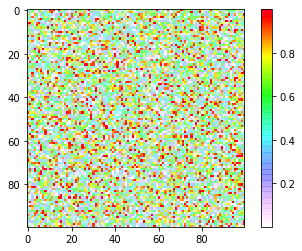

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# get colormap
ncolors = 256
color_array = plt.get_cmap('gist_rainbow_r')(range(ncolors))

# change alpha values
color_array[:,-1] = np.linspace(0.0,1.0,ncolors)

# create a colormap object
map_object = LinearSegmentedColormap.from_list(name='rainbow_alpha',colors=color_array)

# register this new colormap with matplotlib
plt.register_cmap(cmap=map_object)

# show some example data
f,ax = plt.subplots()
h = ax.imshow(np.random.rand(100,100),cmap='rainbow_alpha')
plt.colorbar(mappable=h)

## Make plot
- tpoblem with the background image (not good resolution): https://gis.stackexchange.com/questions/313490/increasing-resolution-of-cartopy-stock-background
- Possible better solution: http://earthpy.org/tag/cartopy.html

In [14]:
os.environ["CARTOPY_USER_BACKGROUNDS"] = "/data/mlalande/PYTHON/cartopy/BG"

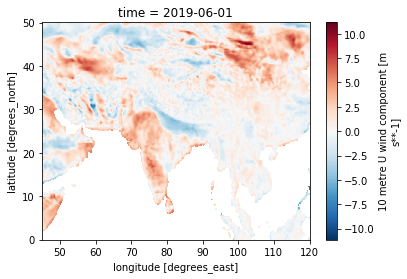

In [16]:
u10[0].plot()

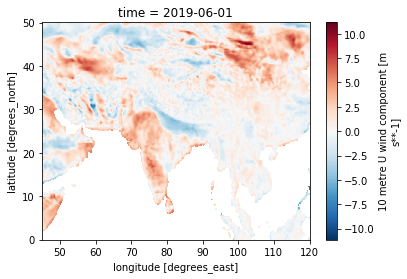

In [18]:
u10[0].plot()

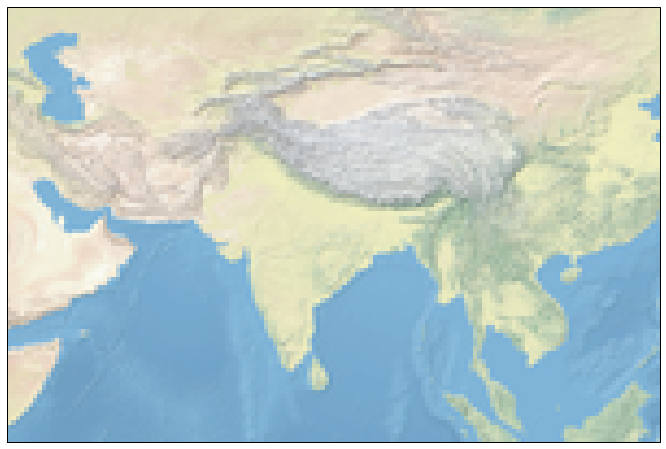

In [19]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([lonlim[0], lonlim[1], latlim[0], latlim[1]], crs=ccrs.PlateCarree())

# Add background image
ax.stock_img()

# Add the tpecip
# tp[0].plot.contourf(ax=ax, cmap='rainbow_alpha', levels=np.arange(0,20.5,0.5), extend='max')

# # Add the winds
# ax.quiver(u10.longitude, u10.latitude, u10[0], v10[0], alpha=0.8)

plt.show()

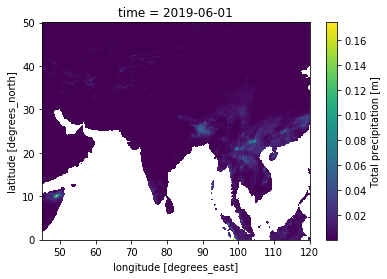

In [24]:
tp[0].plot()

https://stackoverflow.com/questions/18211967/position-colorbar-inside-figure cbar inside figure

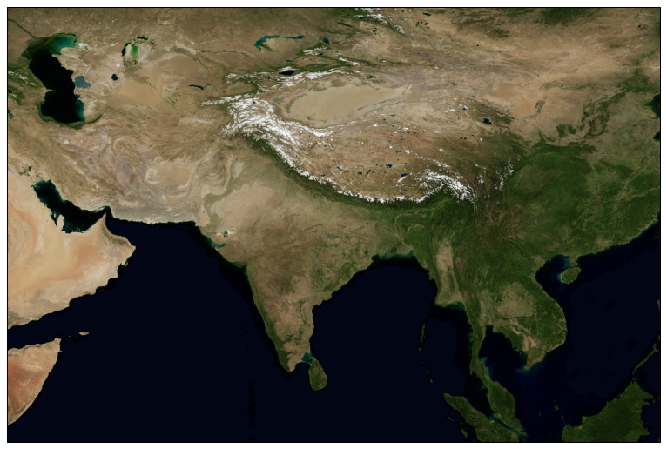

In [21]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([lonlim[0], lonlim[1], latlim[0], latlim[1]], crs=ccrs.PlateCarree())

# Add background image
# ax.stock_img()
ax.background_img(name='BM', resolution='high')

# Add the tpecip
# tp[0].plot.contourf(ax=ax, cmap='rainbow_alpha', levels=np.arange(0,20.5,0.5), extend='max')

# # Add the winds
# ax.quiver(u10.longitude, u10.latitude, u10[0], v10[0], alpha=0.8)

plt.show()

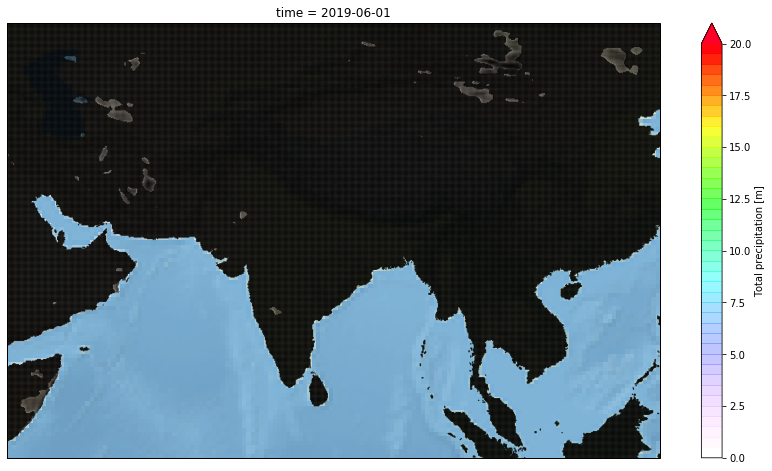

In [11]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([lonlim[0], lonlim[1], latlim[0], latlim[1]], crs=ccrs.PlateCarree())

# Add background image
ax.stock_img()

# Add the tpecip
tp[0].plot.contourf(ax=ax, cmap='rainbow_alpha', levels=np.arange(0,20.5,0.5), extend='max')

# Add the winds
ax.quiver(u10.longitude, u10.latitude, u10[0], v10[0], alpha=0.8)

plt.show()

<ipython-input-86-80fc4119d8ec>:19: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


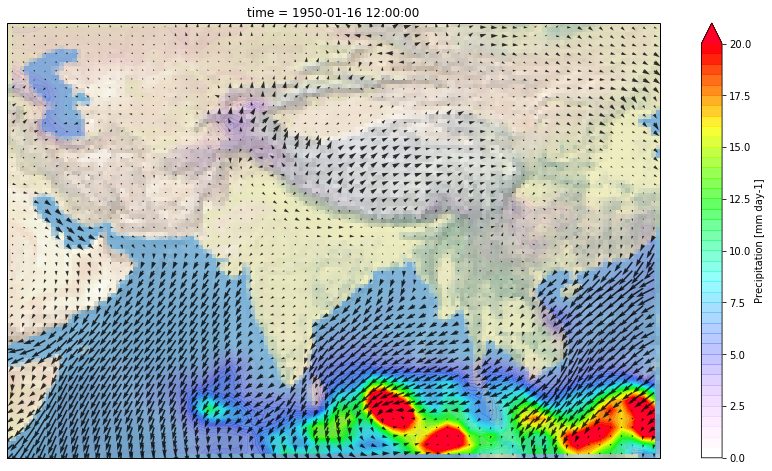

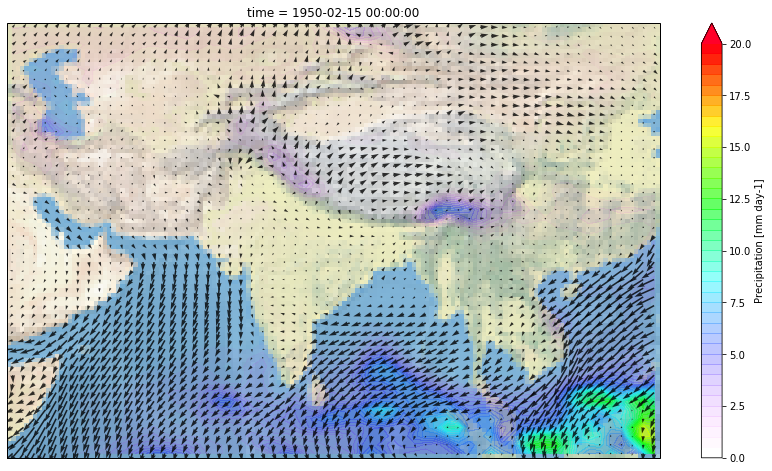

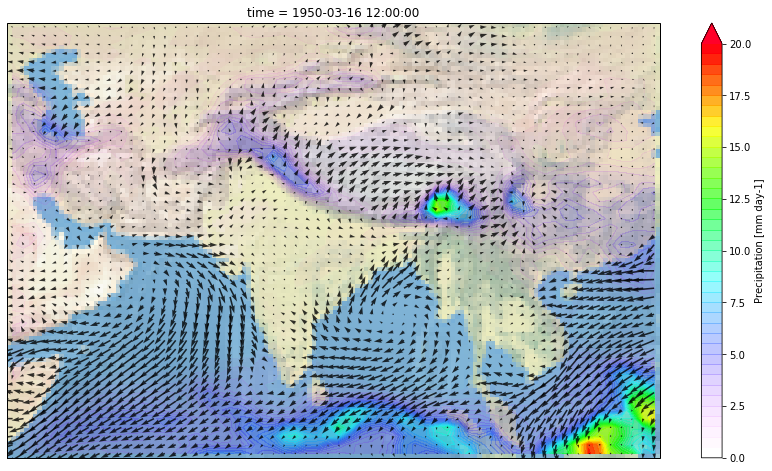

In [86]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


for i in range(3):
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([lonlim[0], lonlim[1], latlim[0], latlim[1]], crs=ccrs.PlateCarree())
    
    # Add background image
    ax.stock_img()

    # Add the tpecip
    tp[i].plot.contourf(ax=ax, cmap='rainbow_alpha', levels=np.arange(0,20.5,0.5), extend='max')

    # Add the winds
    ax.quiver(u10.lon, u10.lat, u10[i], v10[i], alpha=0.8)

    plt.show()

## Save images

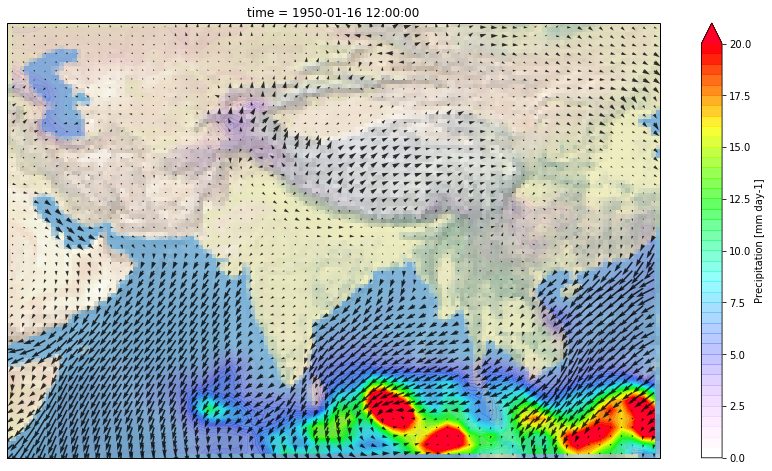

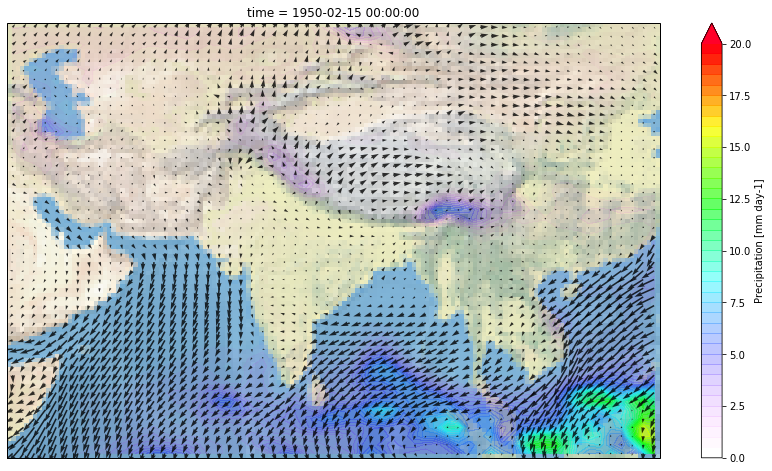

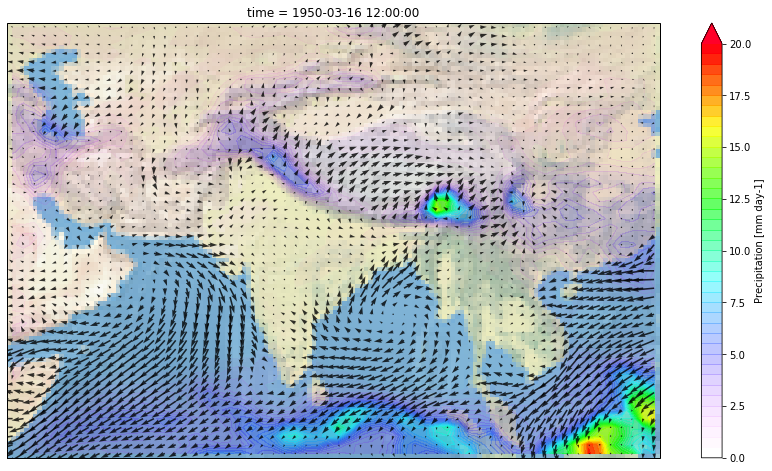

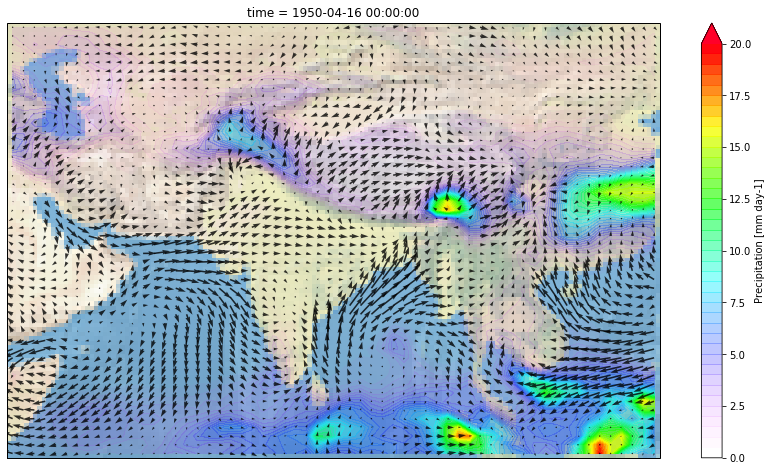

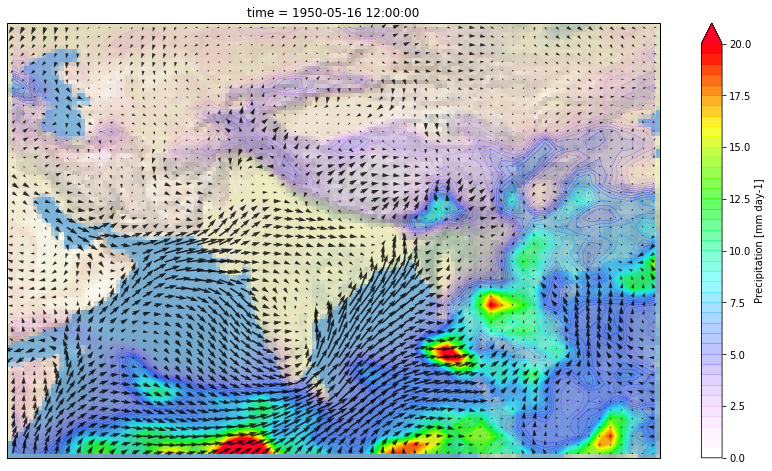

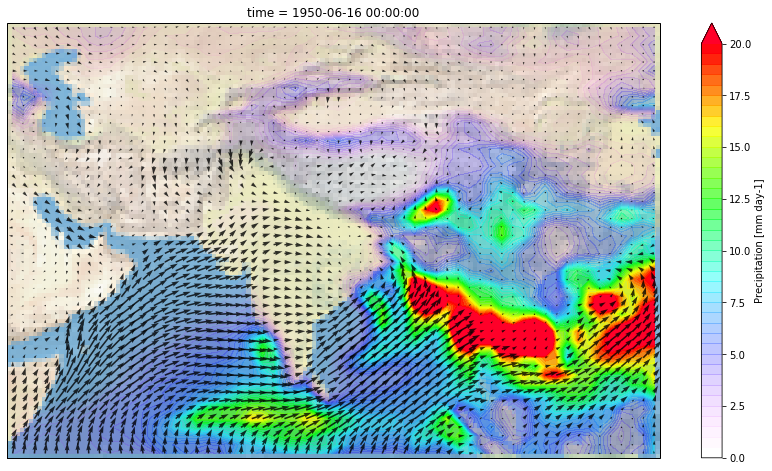

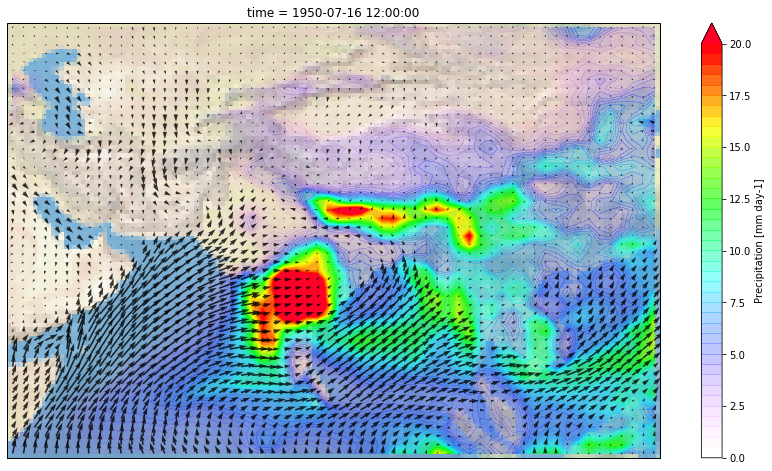

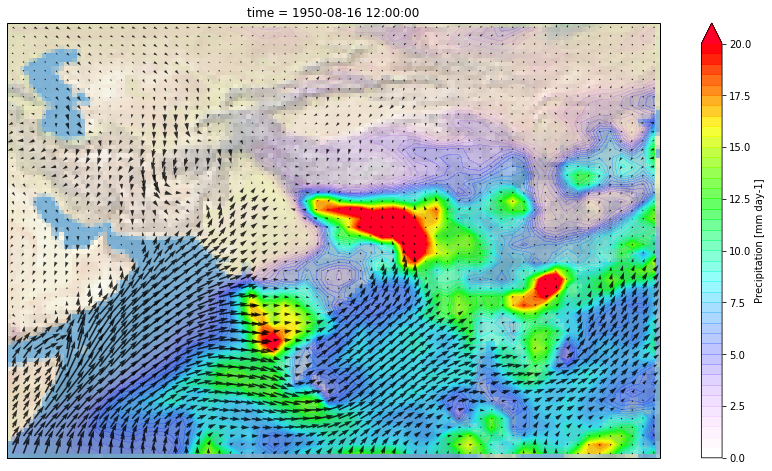

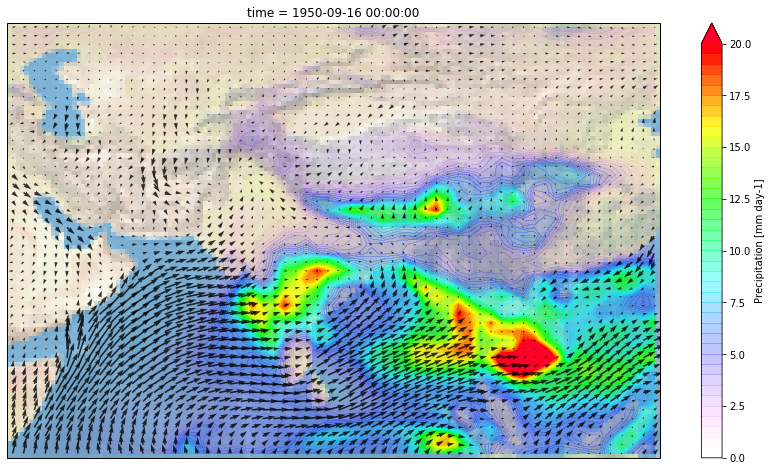

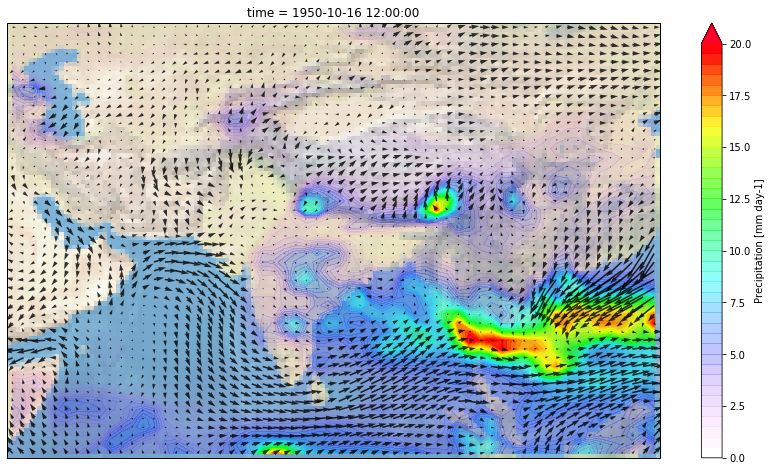

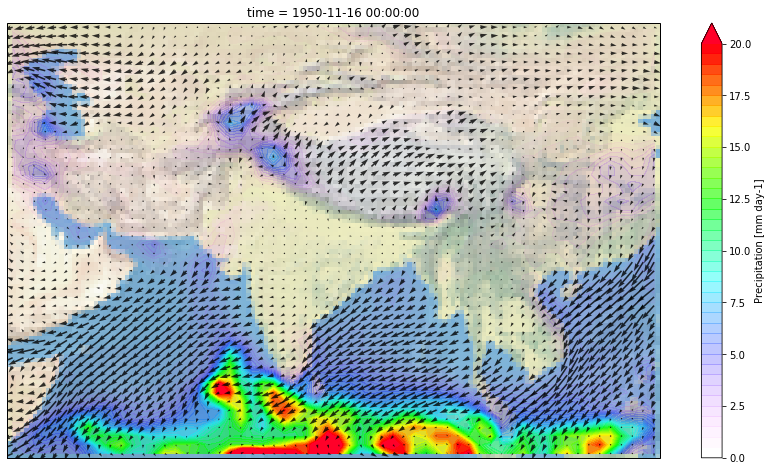

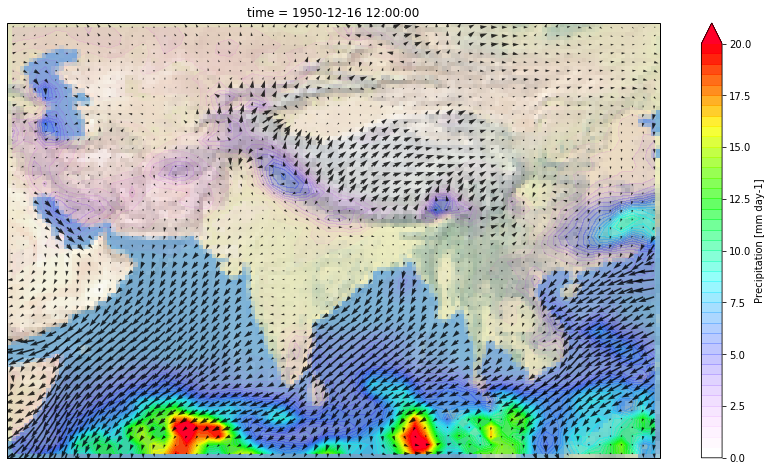

In [93]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


for i in range(12):
    tpint(i)
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([lonlim[0], lonlim[1], latlim[0], latlim[1]], crs=ccrs.PlateCarree())
    
    # Add background image
    ax.stock_img()

    # Add the tpecip
    tp[i].plot.contourf(ax=ax, cmap='rainbow_alpha', levels=np.arange(0,20.5,0.5), extend='max')

    # Add the winds
    ax.quiver(u10.lon, u10.lat, u10[i], v10[i], alpha=0.8)

    plt.savefig('img/jpg/IMG_'+str(i).zfill(4)+'.jpg', dpi=300)

## Make video
https://stackoverflow.com/questions/22965569/convert-from-jpg-to-mp4-by-ffmpeg

I didn't succed with FuncAnimation from matplotlib :https://courspython.com/animation-matplotlib.html

In [94]:
!ffmpeg -f image2 -i img/jpg/IMG_%4d.jpg animation.mp4

ffmpeg: /thredds/ipsl/jservon/miniconda/lib/./libuuid.so.1: no version information available (required by /usr/lib64/libSM.so.6)
ffmpeg version 1.1.5 Copyright (c) 2000-2013 the FFmpeg developers
  built on Jun  5 2013 20:28:06 with gcc 4.4.7 (GCC) 20120313 (Red Hat 4.4.7-3)
  configuration: --prefix=/usr --libdir=/usr/lib64 --shlibdir=/usr/lib64 --mandir=/usr/share/man --incdir=/usr/include --disable-debug --enable-shared --enable-gpl --enable-version3 --disable-avisynth --enable-swscale --enable-postproc --enable-avfilter --enable-avresample --enable-pthreads --enable-x11grab --enable-vaapi --enable-vdpau --enable-runtime-cpudetect --enable-bzlib --enable-fontconfig --enable-frei0r --enable-libass --enable-libbluray --enable-libcelt --enable-libcdio --enable-libfreetype --enable-libiec61883 --enable-libopencv --enable-libmodplug --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libdc1394 --enable-libfaac --enable-libgsm --enable-libmp3lame --enable-libopenjpeg --enable-l